<a href="https://colab.research.google.com/github/Carlosrbrj/DataValidation/blob/main/Produtos_Daju.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise exploratória - BIUD

Esse notebook tem como objetivo criar validar os dados dos clientes antes de subir na plataforma. Para, isso dividi essa análise em três partes, que também forma 3 datasets. Aqui, iremos iniciar análise a partir dos dados de vendas.

Sendo assim, o código abaixo importar todos os pacotes que poderemos usar nessa análise.

In [1]:
# Importação de pacotes
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import cm
import missingno as ms # para tratamento de missings
from sklearn.preprocessing import MinMaxScaler # normalização
from sklearn.preprocessing import StandardScaler # padronização
from sklearn.preprocessing import OrdinalEncoder # ordinal encoding
from sklearn.preprocessing import OneHotEncoder # one-hot encoding e dummy encoding

# Configuração para não exibir os warnings
import warnings
warnings.filterwarnings("ignore")

Agora, vamos subir o dataset que será analisado nessa sessão.

In [2]:
# Esse é o link que será o caminho público do arquivo que montamos.
link_csv = '/content/Produtos - Daju.csv'

In [3]:
# Lê o arquivo
dataset = pd.read_csv(link_csv)

# Mostra as 10 primeiras linhas do dataset
dataset.head(10)

,id,date,description,id.1,name,quantity,value
0,120341821,2022-12-24 17:51:59.000,CORTINAS PRONTAS CORTINAS DUAL VENEZA 420X230 ...,120341821,DAJU ÁGUA VERDE,1.0,249.90
1,120343004,2022-12-24 17:51:59.000,CORTINAS PRONTAS CORTINAS DUPLEX BRUXELAS 540X...,120343004,DAJU ÁGUA VERDE,1.0,699.90
2,120345786,2022-12-24 17:51:59.000,CORTINAS PRONTAS CORTINAS DUPLEX MONACO BARRAD...,120345786,DAJU ÁGUA VERDE,1.0,599.90
3,120340184,2022-12-24 17:51:59.000,CORTINAS PRONTAS CORTINAS RUSTICA CORDOBA 420X...,120340184,DAJU ÁGUA VERDE,1.0,249.90
4,120353753,2022-10-25 16:36:23.000,BANHO TOALHA DE BANHO OTTO 67X135 C NAVAL 3019...,120353753,DAJU PONTA GROSSA,1.0,39.99
5,120354550,2022-10-25 16:36:23.000,BANHO TOALHA DE ROSTO OTTO 49X70 CM NAVAL 3019...,120354550,DAJU PONTA GROSSA,1.0,19.99
6,120354099,2022-10-25 16:36:23.000,SAZONAL PALETA 115 G REF PA DOIS AMORES .,120354099,DAJU PONTA GROSSA,1.0,12.90
7,120349325,2022-10-25 16:36:23.000,TAPETES TAPETE ARTESANAL 36X60 CM REF 1425 CRU .,120349325,DAJU PONTA GROSSA,1.0,9.99
8,120349827,2022-10-25 16:36:23.000,UTILIDADE CONCHA SORVETE 25227/400 SORT .,120349827,DAJU PONTA GROSSA,1.0,19.99
9,120352509,2022-10-25 16:36:23.000,UTILIDADE CONJUNTO COLHERES DE MESA LEME 12 PC...,120352509,DAJU PONTA GROSSA,1.0,34.99


## 1. Análise descritivas

Uma vez carregado o dataset, vamos começar as análises do dataset identificando o seu tamanho, e as informações inciais.

In [4]:
# Mostra as dimensões do dataset
dataset.shape

(199913, 7)

In [5]:
# Mostra as informações do dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199913 entries, 0 to 199912
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   id           199913 non-null  int64  
 1   date         199913 non-null  object 
 2   description  199913 non-null  object 
 3   id.1         199913 non-null  int64  
 4   name         199913 non-null  object 
 5   quantity     199912 non-null  float64
 6   value        199912 non-null  float64
dtypes: float64(2), int64(2), object(3)
memory usage: 10.7+ MB


In [6]:
# Verifica a distribuição de vendas de produtos por unidade
dataset.groupby('name').size()

name
DAJU ATUBA                     9956
DAJU BA                           1
DAJU BARIGUI                 128628
DAJU CABRAL                    6311
DAJU E-COMMERCE TRAY           5314
DAJU ECOMMERCE                  137
DAJU PARANAGUA                 1741
DAJU PONTA GROSSA             10664
DAJU SÃO JOSÉ DOS PINHAIS      8211
DAJU TOLEDO                     699
DAJU ÁGUA VERDE               28251
dtype: int64

In [7]:
# Obtendo as estatísticas descritivas
dataset.describe()

,id,id.1,quantity,value
count,1.999130e+05,1.999130e+05,199912.000000,199912.000000
mean,1.204931e+08,1.204931e+08,1.419965,82.095291
std,1.517445e+05,1.517445e+05,1.457155,116.800498
min,1.201273e+08,1.201273e+08,1.000000,0.000000
25%,1.204494e+08,1.204494e+08,1.000000,24.990000
50%,1.204793e+08,1.204793e+08,1.000000,49.990000
75%,1.204876e+08,1.204876e+08,1.000000,99.800000
max,1.225246e+08,1.225246e+08,200.000000,12000.000000


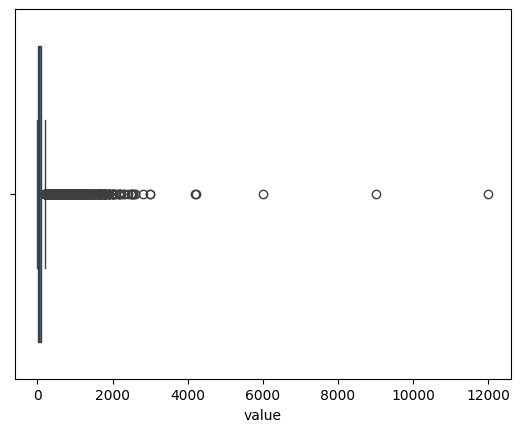

In [8]:
# boxplot com seaborn de Total_valeu
sns.boxplot(x=dataset['value']);

# Verificando valores nulos no dataset

In [9]:
# verificando nulls no dataset
dataset.isnull().sum()

id             0
date           0
description    0
id.1           0
name           0
quantity       1
value          1
dtype: int64

Antes de darmos início ao tratamento de dados, iremos criar um novo dataset para resguardar o orginal. Além disso, no novo dataset, vamos trocar todos os valores zero por Na

<Axes: >

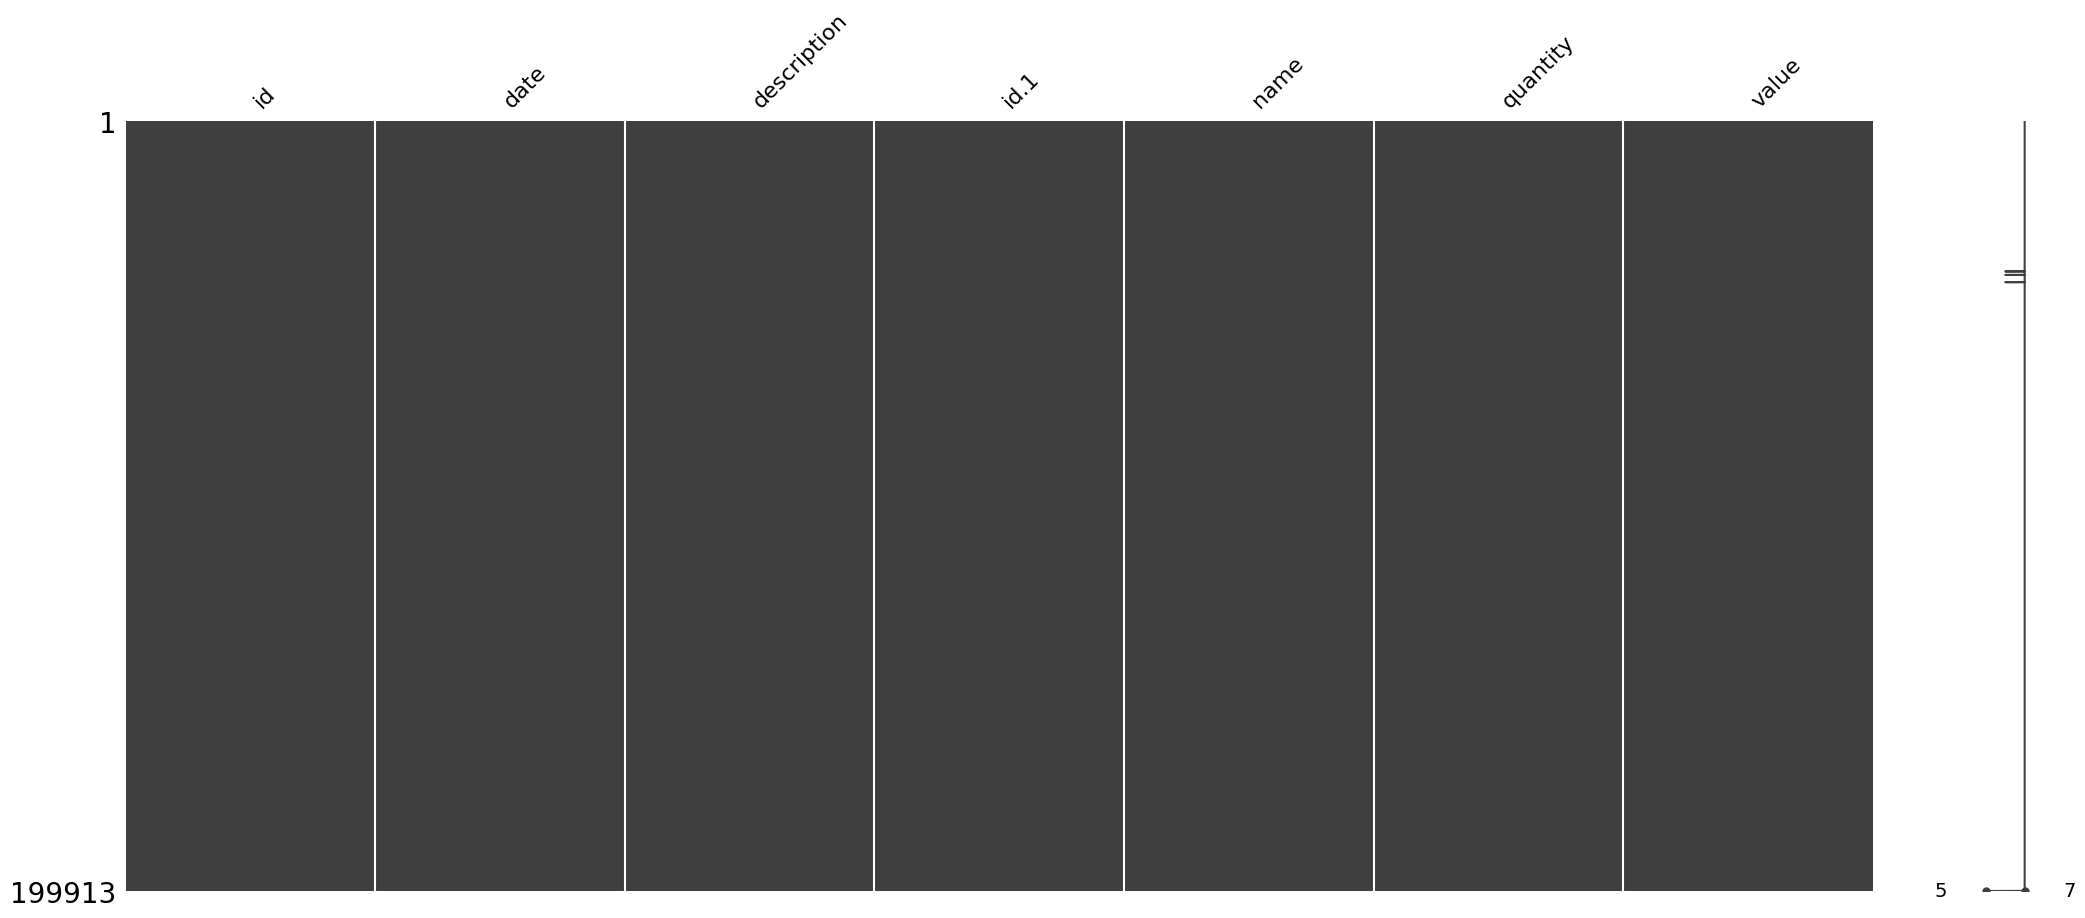

In [10]:
# salvando um NOVO dataset para tratamento de missings (cuidado para não sobrescrever o dataset original!)

# recuperando os nomes das colunas
col = list(dataset.columns)

# o novo dataset irá conter todas as colunas
novodata = dataset[col[:]]

# substituindo os zeros por NaN
novodata.replace(0, np.nan, inplace=True)

# exibindo visualização matricial da nulidade do dataset
ms.matrix(novodata)

In [11]:
# verificando nulls no dataset
novodata.isnull().sum()

id             0
date           0
description    0
id.1           0
name           0
quantity       1
value          6
dtype: int64

In [12]:
# Faz um resumo estatístico do dataset (média, desvio padrão, mínimo, máximo e os quartis)
novodata.describe()

,id,id.1,quantity,value
count,1.999130e+05,1.999130e+05,199912.000000,199907.000000
mean,1.204931e+08,1.204931e+08,1.419965,82.097344
std,1.517445e+05,1.517445e+05,1.457155,116.801237
min,1.201273e+08,1.201273e+08,1.000000,0.010000
25%,1.204494e+08,1.204494e+08,1.000000,24.990000
50%,1.204793e+08,1.204793e+08,1.000000,49.990000
75%,1.204876e+08,1.204876e+08,1.000000,99.800000
max,1.225246e+08,1.225246e+08,200.000000,12000.000000


## 1.2 Visualizações Unimodais

Agora, vamos anáise visualmente como estão distribuídos esse dataset olhando para os atributos Id, value e quantidade.

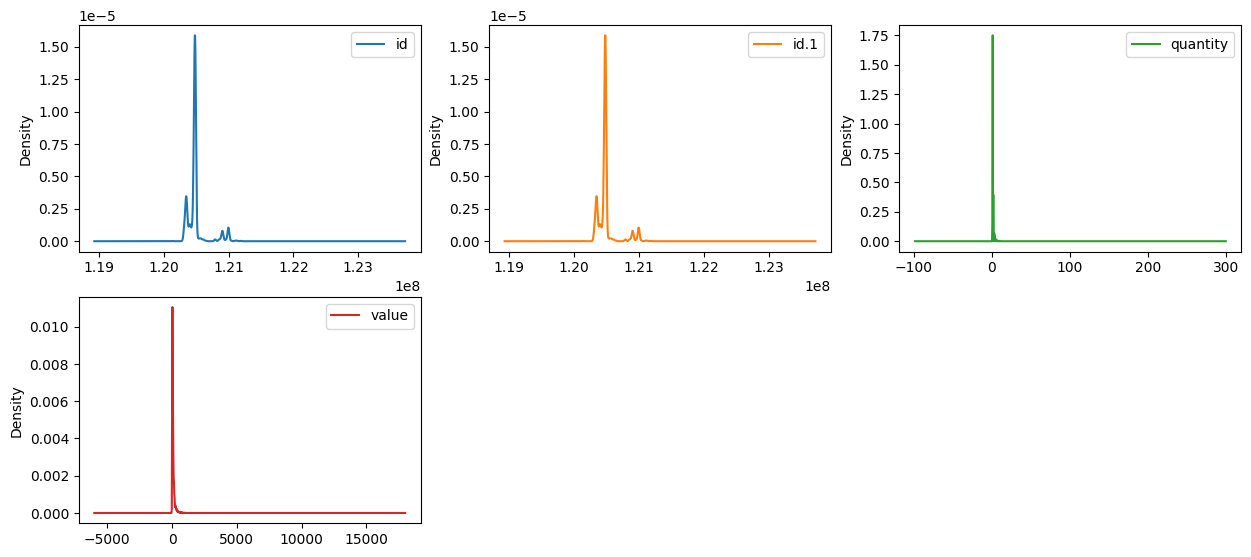

In [13]:
# Density Plot
dataset.plot(kind = 'density', subplots = True, layout = (3,3), sharex = False, figsize = (15,10))
plt.show()

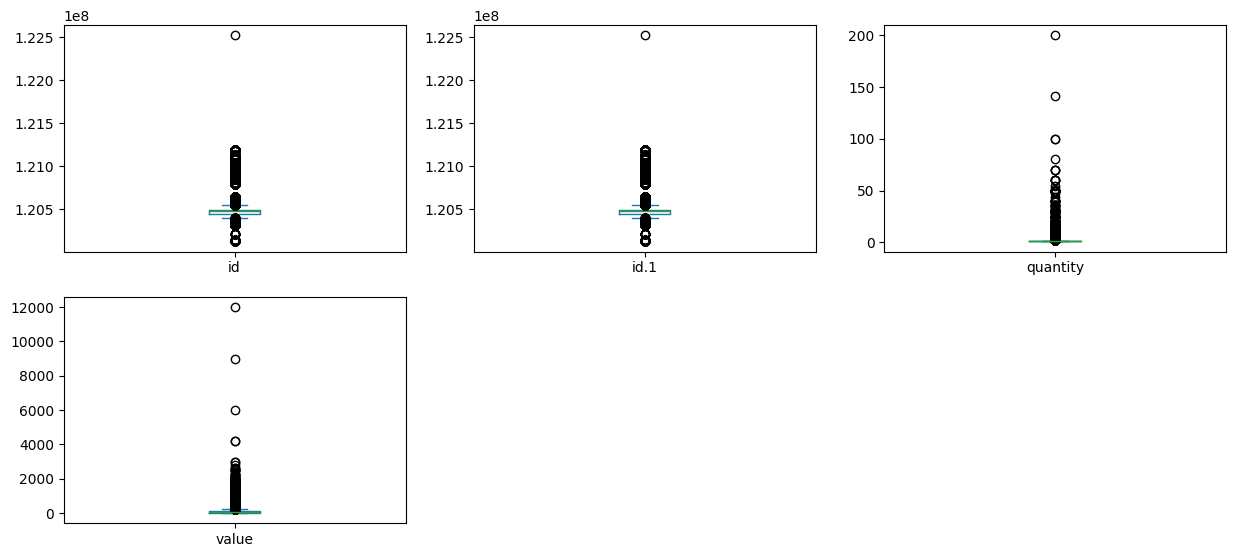

In [14]:
# Boxplot
dataset.plot(kind = 'box', subplots = True, layout = (3,3), sharex = False, sharey = False, figsize = (15,10))
plt.show()

# Visualização histórica de dados

Nessa seção, o nosso objetivo é identificar se existe algum problema com a distribuição da quantidade de produtos por unidade. Faremos isso usando a biblioteca seaborn para gerar os gráficos scatterplot do nome da unidade pela quantidade de Ids.

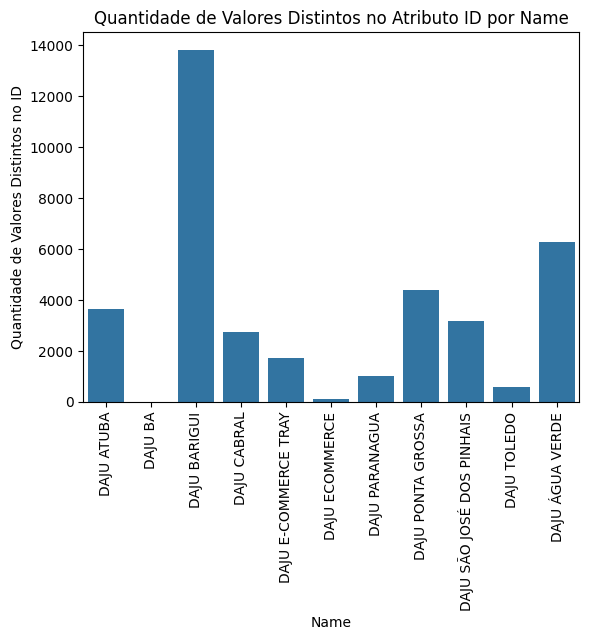

In [22]:
# Agrupar os dados pelo atributo 'name' e contar os valores distintos no atributo 'id'
grouped_dataset = dataset.groupby('name')['id'].nunique().reset_index()
grouped_dataset.columns = ['name', 'distinct_id_count']

# Criar o gráfico de dispersão
sns.barplot(data=grouped_dataset, x='name', y='distinct_id_count')

# Adicionar títulos e rótulos aos eixos
plt.title('Quantidade de Valores Distintos no Atributo ID por Name')
plt.xlabel('Name')
plt.ylabel('Quantidade de Valores Distintos no ID')

# Ajustar rotação dos rótulos do eixo x para melhor visualização
plt.xticks(rotation=90)

# Mostrar o gráfico
plt.show()

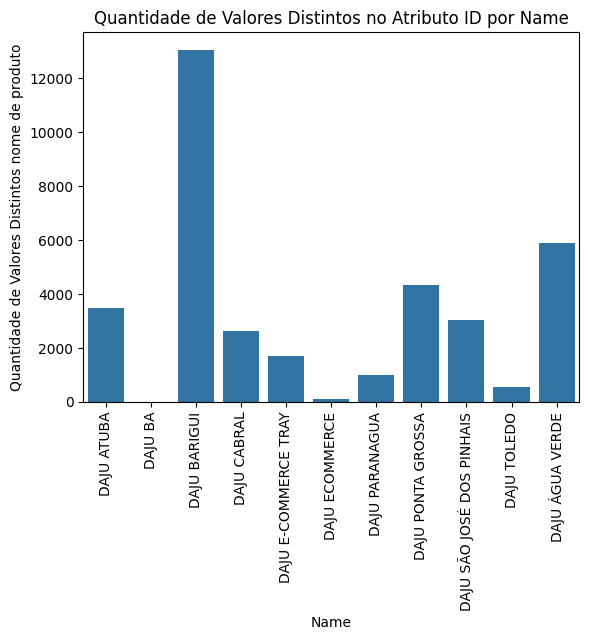

In [24]:
# Agrupar os dados pelo atributo 'name' e contar os valores distintos no atributo 'id'
grouped_dataset = dataset.groupby('name')['description'].nunique().reset_index()
grouped_dataset.columns = ['name', 'distinct_descrp_count']

# Criar o gráfico de dispersão
sns.barplot(data=grouped_dataset, x='name', y='distinct_descrp_count')

# Adicionar títulos e rótulos aos eixos
plt.title('Quantidade de Valores Distintos no Atributo ID por Name')
plt.xlabel('Name')
plt.ylabel('Quantidade de Valores Distintos nome de produto')

# Ajustar rotação dos rótulos do eixo x para melhor visualização
plt.xticks(rotation=90)

# Mostrar o gráfico
plt.show()

Criando uma visualização de série temporal usando a biblioteca seaborn.

O bloco de código abaixo prepara os dados do dataset para isso.

In [19]:
# Converter a coluna 'date' para o formato datetime

dataset['date'] = pd.to_datetime(dataset['date'])

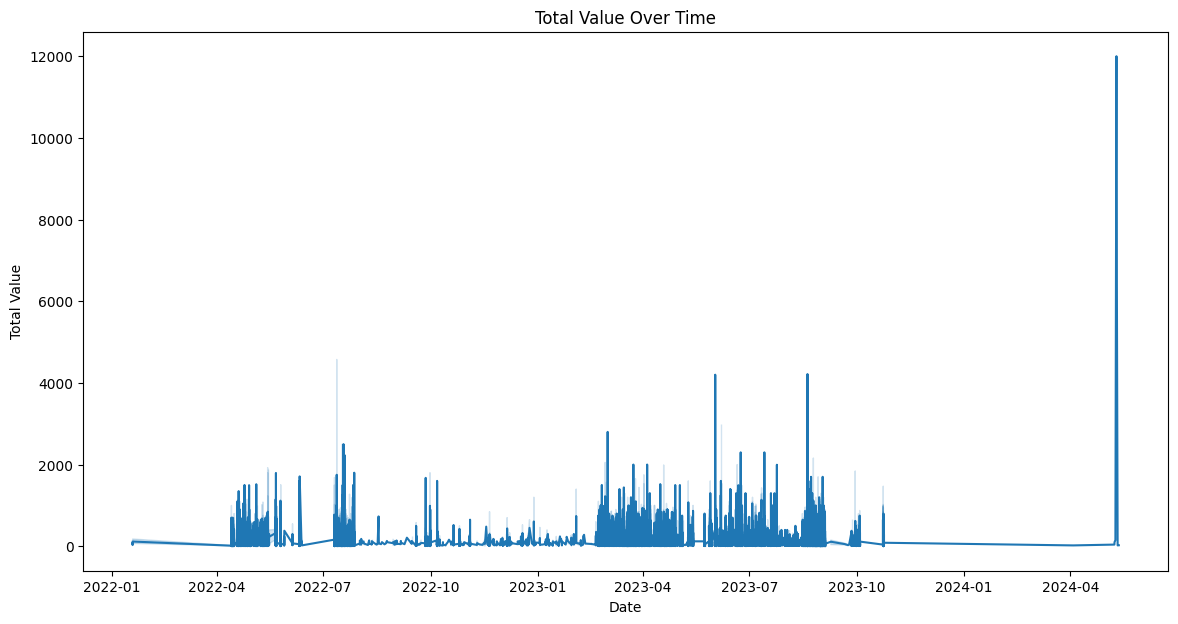

In [21]:
# Criar o gráfico de série temporal
plt.figure(figsize=(14, 7))
sns.lineplot(data=dataset, x='date', y='value')

# Adicionar títulos e rótulos aos eixos
plt.title('Total Value Over Time')
plt.xlabel('Date')
plt.ylabel('Total Value')

# Mostrar o gráfico
plt.show()